In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("financial_news_events.csv")

# Display shape and sample
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (3024, 12)


,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,News_Url
0,2025-05-21,Nikkei 225 index benefits from a weaker yen,Times of India,Commodity Price Shock,DAX,3.52,166.45,NaN,Technology,High,Goldman Sachs,https://timesofindia.indiatimes.com/business/m...
1,2025-05-18,Government subsidy program gives a lift to the...,Financial Times,Central Bank Meeting,Shanghai Composite,-3.39,57.61,NaN,Retail,Low,ExxonMobil,https://timesofindia.indiatimes.com/business/m...
2,2025-06-25,New housing data release shows a slowdown in m...,The Hindu Business Line,Consumer Confidence Report,Shanghai Composite,-0.05,403.22,Neutral,Retail,Medium,Boeing,https://www.moneycontrol.com/us-markets/sp-500
3,2025-07-21,Massive stock buyback program announced by a c...,The Economist,Commodity Price Shock,NSE Nifty,-2.29,100.11,Positive,Consumer Goods,Low,Samsung Electronics,https://www.cnbc.com/2025/09/automotive-indust...
4,2025-07-23,Government spending bill is expected to stimul...,The Motley Fool,Inflation Data Release,Nasdaq Composite,-3.97,438.22,Negative,Consumer Goods,Low,JP Morgan Chase,https://www.bloomberg.com/australia/asx-200-pe...


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop empty rows
df = df.dropna(subset=['Headline']).reset_index(drop=True)

# Check duplicates
df = df.drop_duplicates(subset=['Headline'])
print("After cleaning:", df.shape)

Date                    0
Headline                0
Source                  0
Market_Event            0
Market_Index            0
Index_Change_Percent    0
Trading_Volume          0
Sentiment               0
Sector                  0
Impact_Level            0
Related_Company         0
News_Url                0
dtype: int64
After cleaning: (50, 12)


In [ ]:
# Fill missing Headlines using News_Url (if possible)
df['Headline'] = df['Headline'].fillna(df['News_Url'])

# Fill missing Sentiment with 'Neutral'
df['Sentiment'] = df['Sentiment'].fillna('Neutral')

# Fill missing Index_Change_Percent with 0
df['Index_Change_Percent'] = df['Index_Change_Percent'].fillna(0)
df = df.drop_duplicates(subset=['Headline']).reset_index(drop=True)
print("After cleaning:", df.shape)


After cleaning: (50, 15)


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop empty rows
df = df.dropna(subset=['Headline']).reset_index(drop=True)

# Check duplicates
df = df.drop_duplicates(subset=['Headline'])
print("After cleaning:", df.shape)

Date                    0
Headline                0
Source                  0
Market_Event            0
Market_Index            0
Index_Change_Percent    0
Trading_Volume          0
Sentiment               0
Sector                  0
Impact_Level            0
Related_Company         0
News_Url                0
dtype: int64
After cleaning: (50, 12)


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('financial_news_events.csv')

def preprocess_data(df):
    # Convert 'Date' to datetime, drop invalid dates
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])

    # Strip whitespace from string columns
    str_cols = ['Headline', 'Source', 'Market_Event', 'Sentiment', 'Sector', 'Impact_Level', 'Related_Company']
    for col in str_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()

    # Lowercase headlines for uniformity
    df['Headline'] = df['Headline'].str.lower()

    # Fill missing categorical values with 'missing'
    for col in str_cols:
        if col in df.columns:
            df[col] = df[col].replace(['nan', 'NaN', 'None', ''], 'missing')
            df[col] = df[col].fillna('missing')

    # Replace any missing numeric values with median (for Index_Change_Percent, Trading_Volume)
    num_cols = ['Index_Change_Percent', 'Trading_Volume']
    for col in num_cols:
        if col in df.columns:
            median_val = df[col].median()
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(median_val)

    return df

df = preprocess_data(df)

print("Preprocessing done. Here's the updated dataframe info:")
print(df.info())


Preprocessing done. Here's the updated dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3024 non-null   datetime64[ns]
 1   Headline              3024 non-null   object        
 2   Source                3024 non-null   object        
 3   Market_Event          3024 non-null   object        
 4   Market_Index          3024 non-null   object        
 5   Index_Change_Percent  3024 non-null   float64       
 6   Trading_Volume        3024 non-null   float64       
 7   Sentiment             3024 non-null   object        
 8   Sector                3024 non-null   object        
 9   Impact_Level          3024 non-null   object        
 10  Related_Company       3024 non-null   object        
 11  News_Url              2871 non-null   object        
dtypes: datetime64[ns](1),

In [ ]:
!pip install nltk pandas


In [ ]:
import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Example: financial_news_events.csv  (columns: date, headline)
df = pd.read_csv("financial_news_events.csv")
df = df.dropna(subset=['Headline'])
print(df.head(2))

         Date                                           Headline  \
0  2025-05-21        Nikkei 225 index benefits from a weaker yen   
1  2025-05-18  Government subsidy program gives a lift to the...   

            Source           Market_Event        Market_Index  \
0   Times of India  Commodity Price Shock                 DAX   
1  Financial Times   Central Bank Meeting  Shanghai Composite   

   Index_Change_Percent  Trading_Volume Sentiment      Sector Impact_Level  \
0                  3.52          166.45       NaN  Technology         High   
1                 -3.39           57.61       NaN      Retail          Low   

  Related_Company                                           News_Url  
0   Goldman Sachs  https://timesofindia.indiatimes.com/business/m...  
1      ExxonMobil  https://timesofindia.indiatimes.com/business/m...  


In [ ]:
def clean_and_normalize(text):
    text = str(text)
    # --- basic cleanup ---
    text = re.sub(r'http\S+|www\S+', '', text)           # remove URLs
    text = re.sub(r'<.*?>', '', text)                    # remove HTML tags
    text = re.sub(r'[^A-Za-z0-9$€%.,/\-\s]', '', text)   # keep financial chars
    text = re.sub(r'\s+', ' ', text).strip()             # normalize spaces

    # --- domain-specific normalization ---
    text = re.sub(r'\$([0-9\.]+)B', r'\1 billion USD', text)
    text = re.sub(r'\$([0-9\.]+)M', r'\1 million USD', text)
    text = re.sub(r'€([0-9\.]+)B', r'\1 billion EUR', text)
    text = re.sub(r'€([0-9\.]+)M', r'\1 million EUR', text)

    # common finance abbreviations
    text = re.sub(r'\bP/E\b', ' price to earnings ratio ', text, flags=re.IGNORECASE)
    text = re.sub(r'\bEPS\b', ' earnings per share ', text, flags=re.IGNORECASE)
    text = re.sub(r'\bEBITDA\b',
                  ' earnings before interest taxes depreciation and amortization ',
                  text, flags=re.IGNORECASE)
    text = re.sub(r'%',' percent ', text)

    return text

df['clean_text'] = df['Headline'].apply(clean_and_normalize)


In [ ]:
df['tokens'] = df['clean_text'].apply(word_tokenize)
print(df['tokens'].head(2))


0    [Nikkei, 225, index, benefits, from, a, weaker...
1    [Government, subsidy, program, gives, a, lift,...
Name: tokens, dtype: object


In [ ]:
df['pos_tags'] = df['tokens'].apply(pos_tag)
print(df['pos_tags'].iloc[0][:10])   # first 10 tagged tokens


[('Nikkei', 'NNP'), ('225', 'CD'), ('index', 'NN'), ('benefits', 'NNS'), ('from', 'IN'), ('a', 'DT'), ('weaker', 'JJR'), ('yen', 'NN')]


In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tagged_tokens):
    lemmas = []
    for word, tag in tagged_tokens:
        tag_lower = tag[0].lower()
        if tag_lower == 'j':
            pos = 'a'   # adjective
        elif tag_lower in ['v', 'n', 'r']:
            pos = tag_lower
        else:
            pos = 'n'
        lemmas.append(lemmatizer.lemmatize(word.lower(), pos))
    return lemmas

df['lemmas'] = df['pos_tags'].apply(lemmatize_tokens)
print(df['lemmas'].head(2))


0    [nikkei, 225, index, benefit, from, a, weak, yen]
1    [government, subsidy, program, give, a, lift, ...
Name: lemmas, dtype: object


In [ ]:
df[['Date','Headline','clean_text','lemmas']].to_csv('preprocessed_financial_news.csv', index=False)
print("✅ Preprocessing complete — saved as preprocessed_financial_news.csv")

✅ Preprocessing complete — saved as preprocessed_financial_news.csv


In [ ]:
from google.colab import files
files.download('preprocessed_financial_news.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Basic info and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3024 non-null   datetime64[ns]
 1   Headline              3024 non-null   object        
 2   Source                3024 non-null   object        
 3   Market_Event          3024 non-null   object        
 4   Market_Index          3024 non-null   object        
 5   Index_Change_Percent  3024 non-null   float64       
 6   Trading_Volume        3024 non-null   float64       
 7   Sentiment             3024 non-null   object        
 8   Sector                3024 non-null   object        
 9   Impact_Level          3024 non-null   object        
 10  Related_Company       3024 non-null   object        
 11  News_Url              2871 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(9)
m

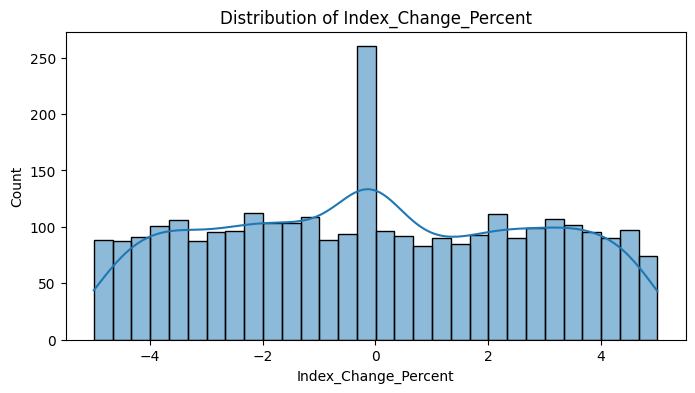

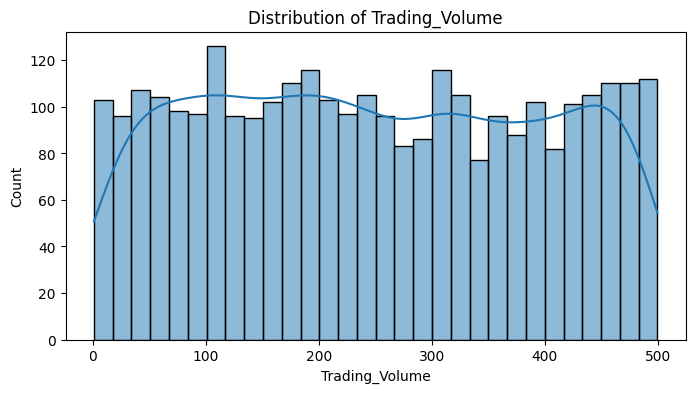

/tmp/ipython-input-2845525390.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


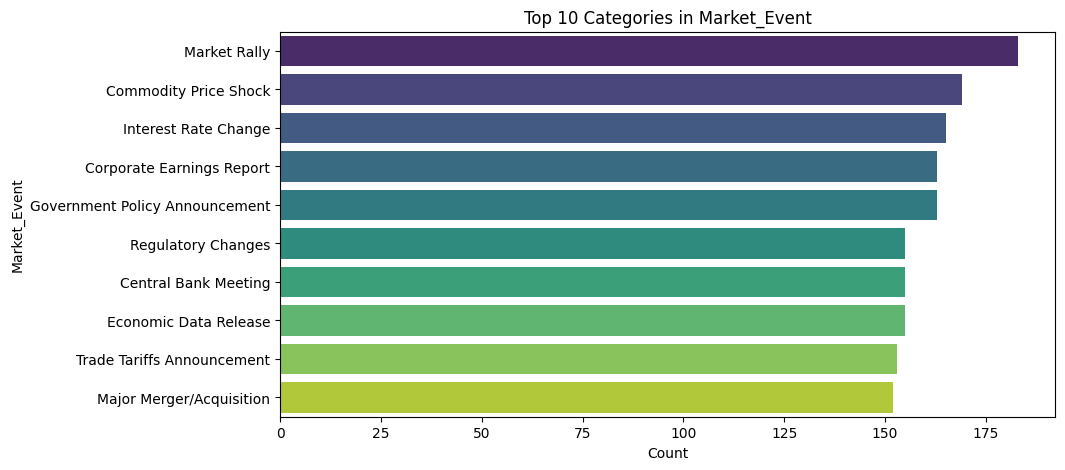

/tmp/ipython-input-2845525390.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


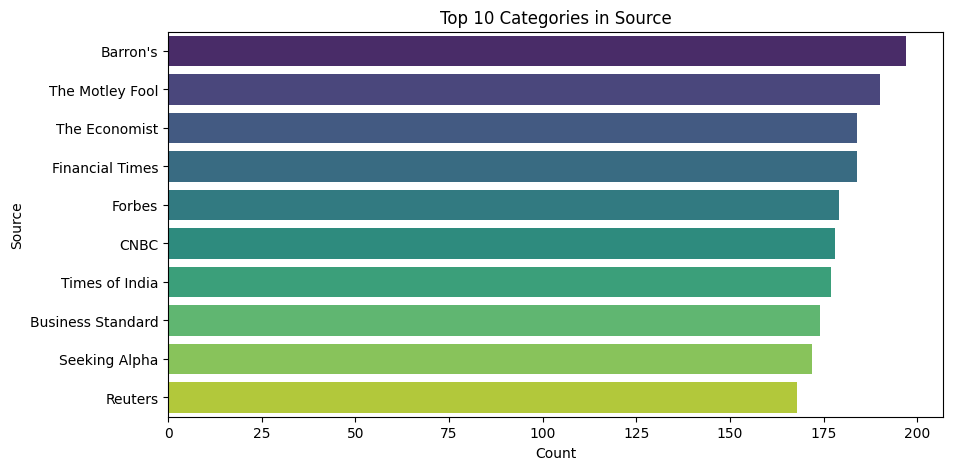

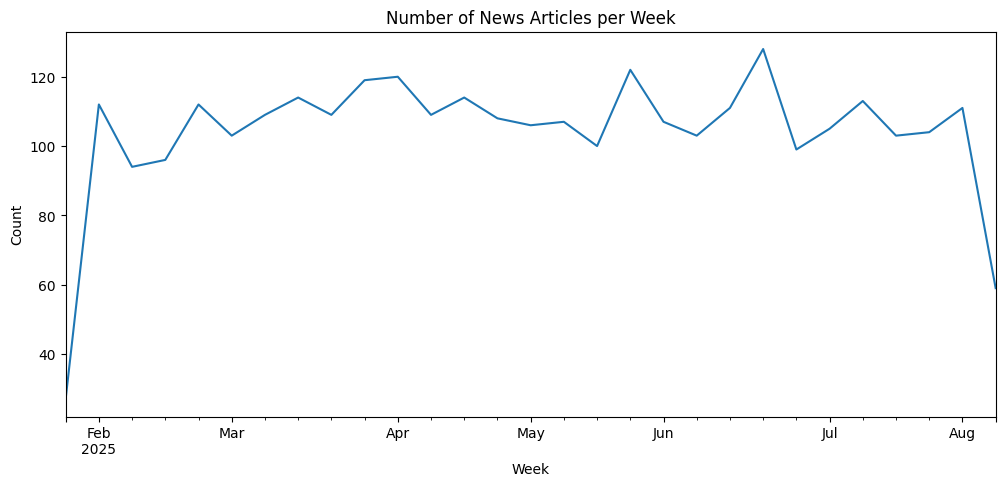

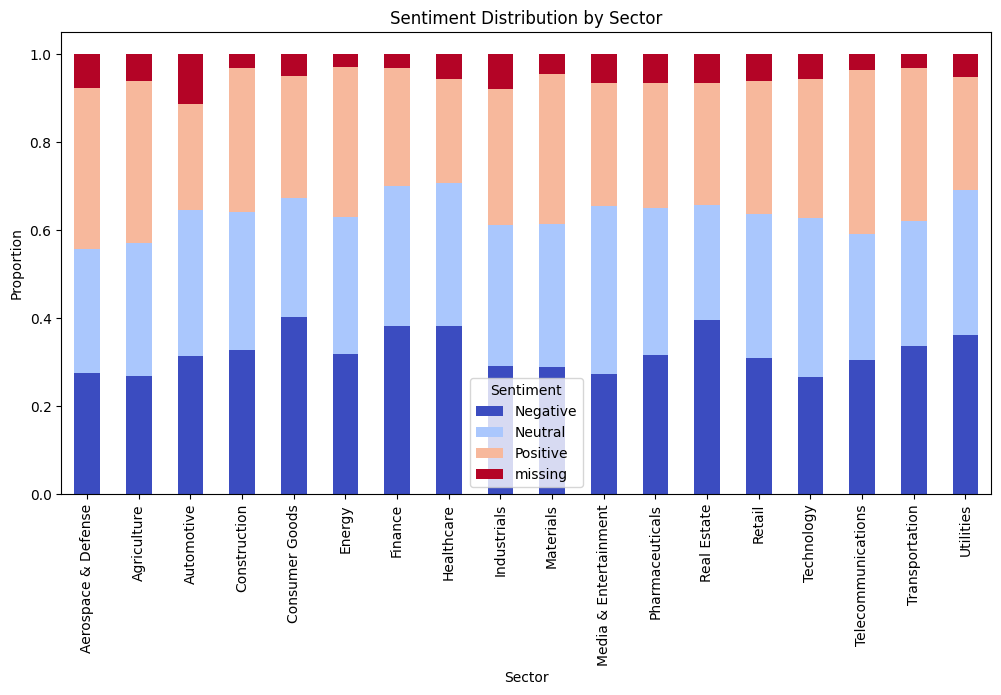

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assumes 'df' is preprocessed and loaded

def eda_overview(df):
    print("Basic info and missing values:")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())

    print("\nUnique values per categorical column:")
    for col in ['Source', 'Market_Event', 'Sentiment', 'Sector', 'Impact_Level', 'Related_Company']:
        if col in df.columns:
            print(f"{col}: {df[col].nunique()} unique values")

def plot_numeric_distributions(df):
    num_cols = ['Index_Change_Percent', 'Trading_Volume']
    for col in num_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 4))
            sns.histplot(df[col], kde=True, bins=30)
            plt.title(f'Distribution of {col}')
            plt.show()

def plot_top_categories(df, col, top_n=10):
    if col in df.columns:
        top_categories = df[col].value_counts().head(top_n)
        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
        plt.title(f'Top {top_n} Categories in {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

def plot_news_time_trend(df):
    df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_counts = df.groupby('Week').size()
    plt.figure(figsize=(12, 5))
    weekly_counts.plot()
    plt.title('Number of News Articles per Week')
    plt.xlabel('Week')
    plt.ylabel('Count')
    plt.show()

def plot_sentiment_by_sector(df):
    if 'Sentiment' in df.columns and 'Sector' in df.columns:
        sentiment_sector = pd.crosstab(df['Sector'], df['Sentiment'], normalize='index')
        sentiment_sector.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
        plt.title('Sentiment Distribution by Sector')
        plt.ylabel('Proportion')
        plt.show()

# Run EDA steps
eda_overview(df)
plot_numeric_distributions(df)
plot_top_categories(df, 'Market_Event')
plot_top_categories(df, 'Source')
plot_news_time_trend(df)
plot_sentiment_by_sector(df)


Top Market Events:
Market_Event
Market Rally                      183
Commodity Price Shock             169
Interest Rate Change              165
Corporate Earnings Report         163
Government Policy Announcement    163
Regulatory Changes                155
Central Bank Meeting              155
Economic Data Release             155
Trade Tariffs Announcement        153
Major Merger/Acquisition          152
Name: count, dtype: int64


/tmp/ipython-input-3110859439.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=event_counts.head(10).index, x=event_counts.head(10).values, palette='magma')


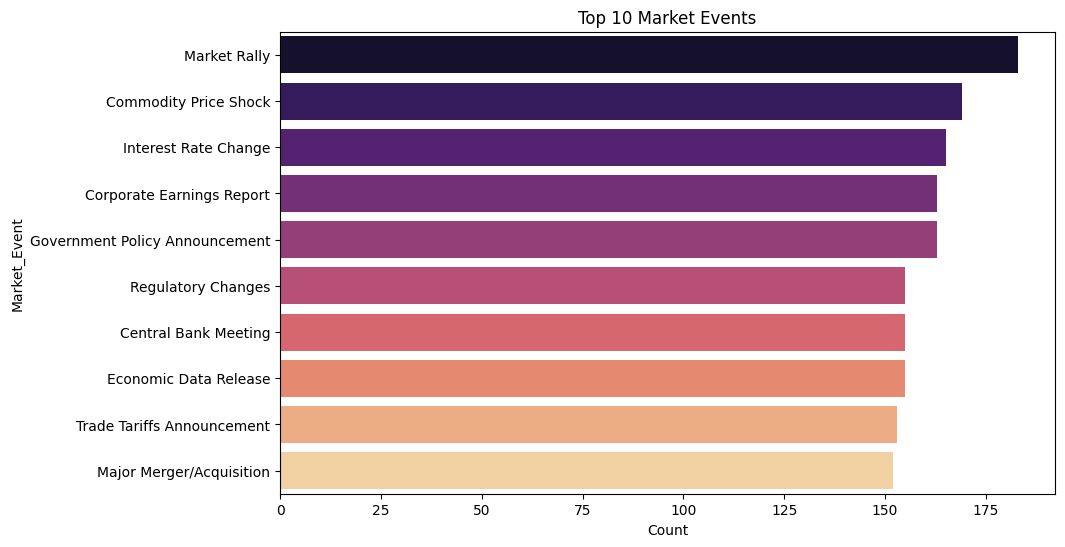

/tmp/ipython-input-3110859439.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='coolwarm')


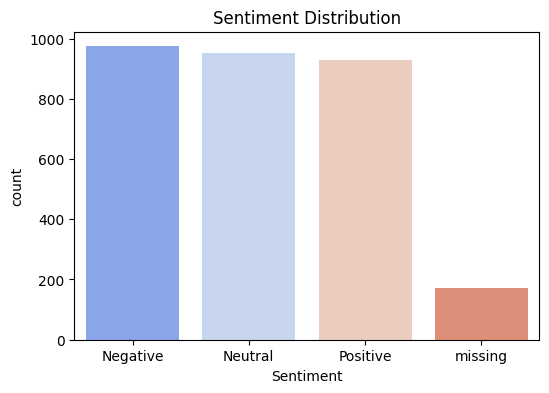

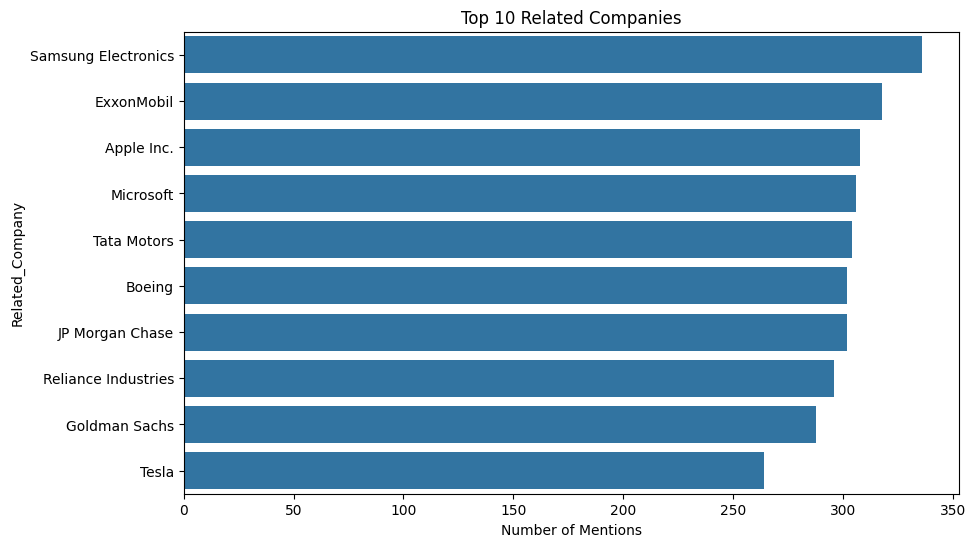

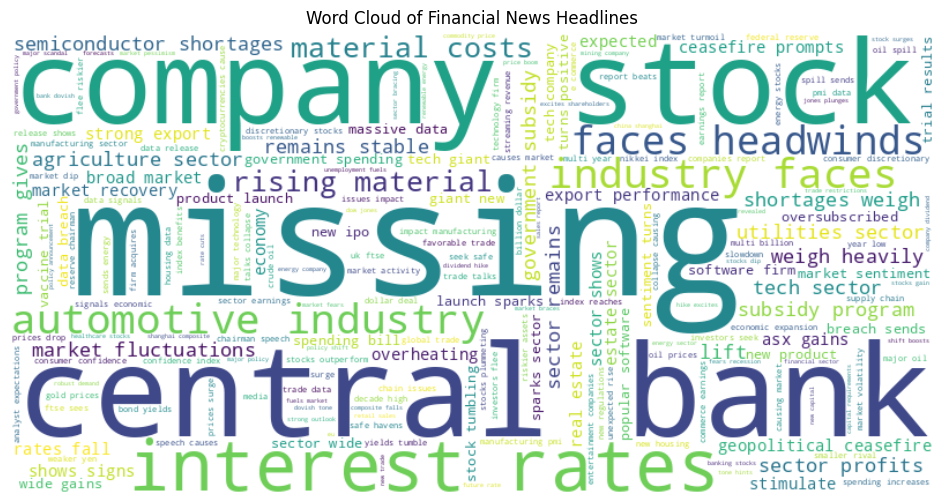

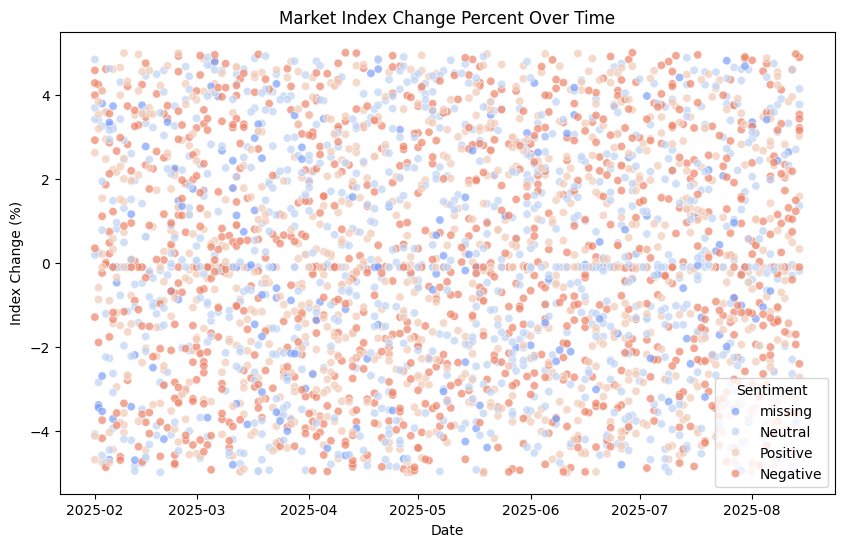

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Assume df is loaded and preprocessed

# 1. Most common Market Events
event_counts = df['Market_Event'].value_counts()
print("Top Market Events:")
print(event_counts.head(10))

plt.figure(figsize=(10,6))
sns.barplot(y=event_counts.head(10).index, x=event_counts.head(10).values, palette='magma')
plt.title('Top 10 Market Events')
plt.xlabel('Count')
plt.show()

# 2. Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

# 3. Related Company Frequency
company_counts = df['Related_Company'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=company_counts.index, x=company_counts.values)
plt.title('Top 10 Related Companies')
plt.xlabel('Number of Mentions')
plt.show()

# 4. Word Cloud of Headlines
all_headlines = ' '.join(df['Headline'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_headlines)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Financial News Headlines')
plt.show()

# 5. Distribution of Market_Index Changes (scatter plot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Date', y='Index_Change_Percent', hue='Sentiment', palette='coolwarm', alpha=0.7)
plt.title('Market Index Change Percent Over Time')
plt.xlabel('Date')
plt.ylabel('Index Change (%)')
plt.show()


In [ ]:
from transformers import MarianMTModel, MarianTokenizer

def back_translate(text, src_lang="en", mid_lang="fr"):
    # English to French
    en_to_fr_model_name = f'Helsinki-NLP/opus-mt-{src_lang}-{mid_lang}'
    fr_to_en_model_name = f'Helsinki-NLP/opus-mt-{mid_lang}-{src_lang}'

    tokenizer_en_fr = MarianTokenizer.from_pretrained(en_to_fr_model_name)
    model_en_fr = MarianMTModel.from_pretrained(en_to_fr_model_name)

    tokenizer_fr_en = MarianTokenizer.from_pretrained(fr_to_en_model_name)
    model_fr_en = MarianMTModel.from_pretrained(fr_to_en_model_name)

    # Translate English -> French
    encoded = tokenizer_en_fr.prepare_seq2seq_batch([text], return_tensors="pt")
    translated = model_en_fr.generate(**encoded)
    fr_text = tokenizer_en_fr.batch_decode(translated, skip_special_tokens=True)[0]

    # Translate French -> English (back)
    encoded_back = tokenizer_fr_en.prepare_seq2seq_batch([fr_text], return_tensors="pt")
    back_translated = model_fr_en.generate(**encoded_back)
    back_text = tokenizer_fr_en.batch_decode(back_translated, skip_special_tokens=True)[0]

    return back_text

# Example
original_text = "Apple's earnings grew significantly in the last quarter."
augmented_text = back_translate(original_text)
print("Original:", original_text)
print("Back-Translated:", augmented_text)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:4129: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

Original: Apple's earnings grew significantly in the last quarter.
Back-Translated: Apple's earnings increased significantly in the last quarter.


In [ ]:
import nlpaug.augmenter.word as naw
import nltk

# Download the required NLTK resource if not already present
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')


# Initialize synonym augmenter
syn_aug = naw.SynonymAug(aug_src='wordnet')

# Example sentence
text = "The company's revenue increased dramatically in 2023."

# Augment text
augmented_text = syn_aug.augment(text)
print("Original:", text)
print("Augmented:", augmented_text)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Original: The company's revenue increased dramatically in 2023.
Augmented: ["The ship's company ' s taxation increased dramatically in 2023."]


In [ ]:
import random

def entity_masking(text, entities_dict):
    # entities_dict: {"Apple": ["Microsoft", "Google", "Amazon"], ...}
    for entity, replacements in entities_dict.items():
        if entity in text:
            replacement = random.choice(replacements)
            text = text.replace(entity, replacement)
    return text

text = "Apple announced new earnings for Q2 2023."
entities_to_replace = {
    "Apple": ["Microsoft", "Google", "Amazon"],
    "Q2 2023": ["Q3 2023", "Q4 2022"]
}

augmented_text = entity_masking(text, entities_to_replace)
print("Original:", text)
print("Entity-masked:", augmented_text)


Original: Apple announced new earnings for Q2 2023.
Entity-masked: Google announced new earnings for Q3 2023.
